### Exploratory Analysis

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [ ]:
data= pd.read_excel("/content/Womens Clothing Reviews Data.xlsx")

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23486 entries, 0 to 23485

Data columns (total 11 columns):

 #   Column          Non-Null Count  Dtype 

---  ------          --------------  ----- 

 0   Product ID      23486 non-null  int64 

 1   Category        23472 non-null  object

 2   Subcategory1    23472 non-null  object

 3   SubCategory2    23472 non-null  object

 4   Location        23486 non-null  object

 5   Channel         23486 non-null  object

 6   Customer Age    23486 non-null  int64 

 7   Review Title    19676 non-null  object

 8   Review Text     22641 non-null  object

 9   Rating          23486 non-null  int64 

 10  Recommend Flag  23486 non-null  int64 

dtypes: int64(4), object(7)

memory usage: 2.0+ MB


In [ ]:
print(data.columns)

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',

       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',

       'Recommend Flag'],

      dtype='object')


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
data.dataframeName = 'Womens Clothing E-Commerce Reviews.xlsx'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 23486 rows and 11 columns


In [ ]:
data.head(5)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


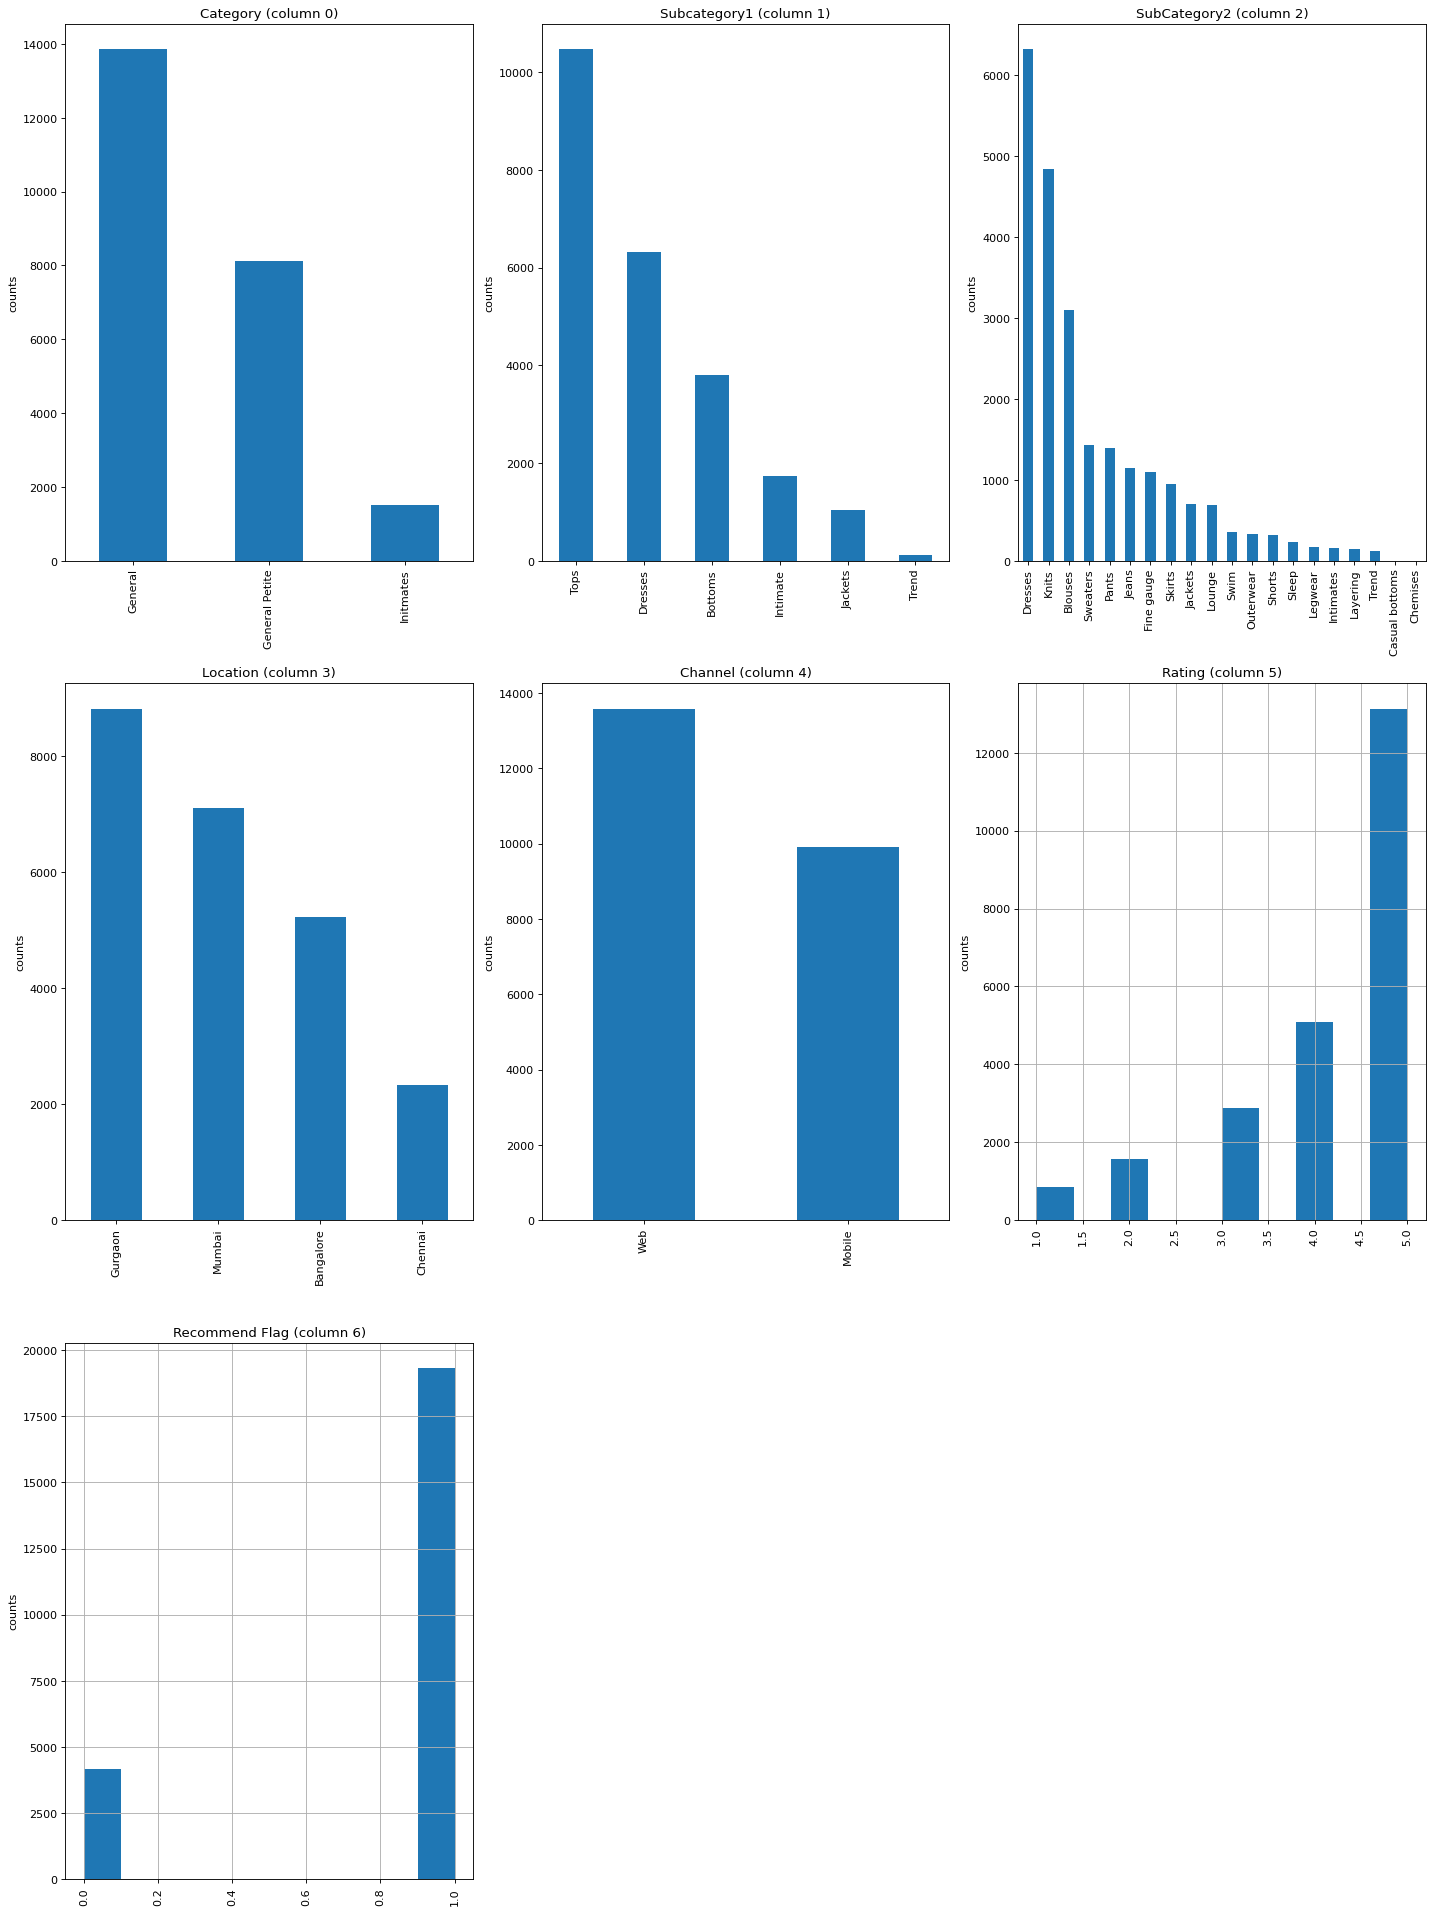

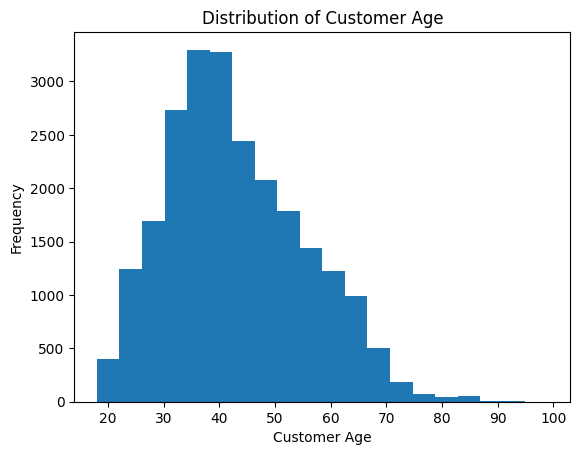

In [ ]:
plotPerColumnDistribution(data,10,3)
#plotPerColumnDistribution(data[['Customer Age']], 1, 1)
plt.hist(data['Customer Age'], bins=20)
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

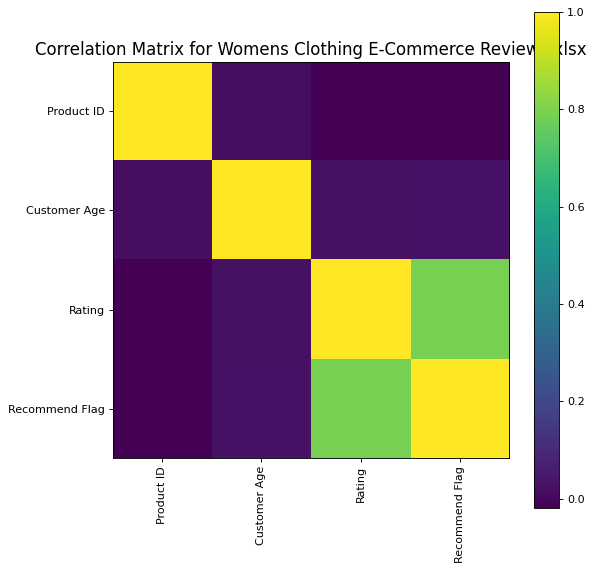

In [ ]:
plotCorrelationMatrix(data, 8)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_7024\102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.

  df = df.dropna('columns')


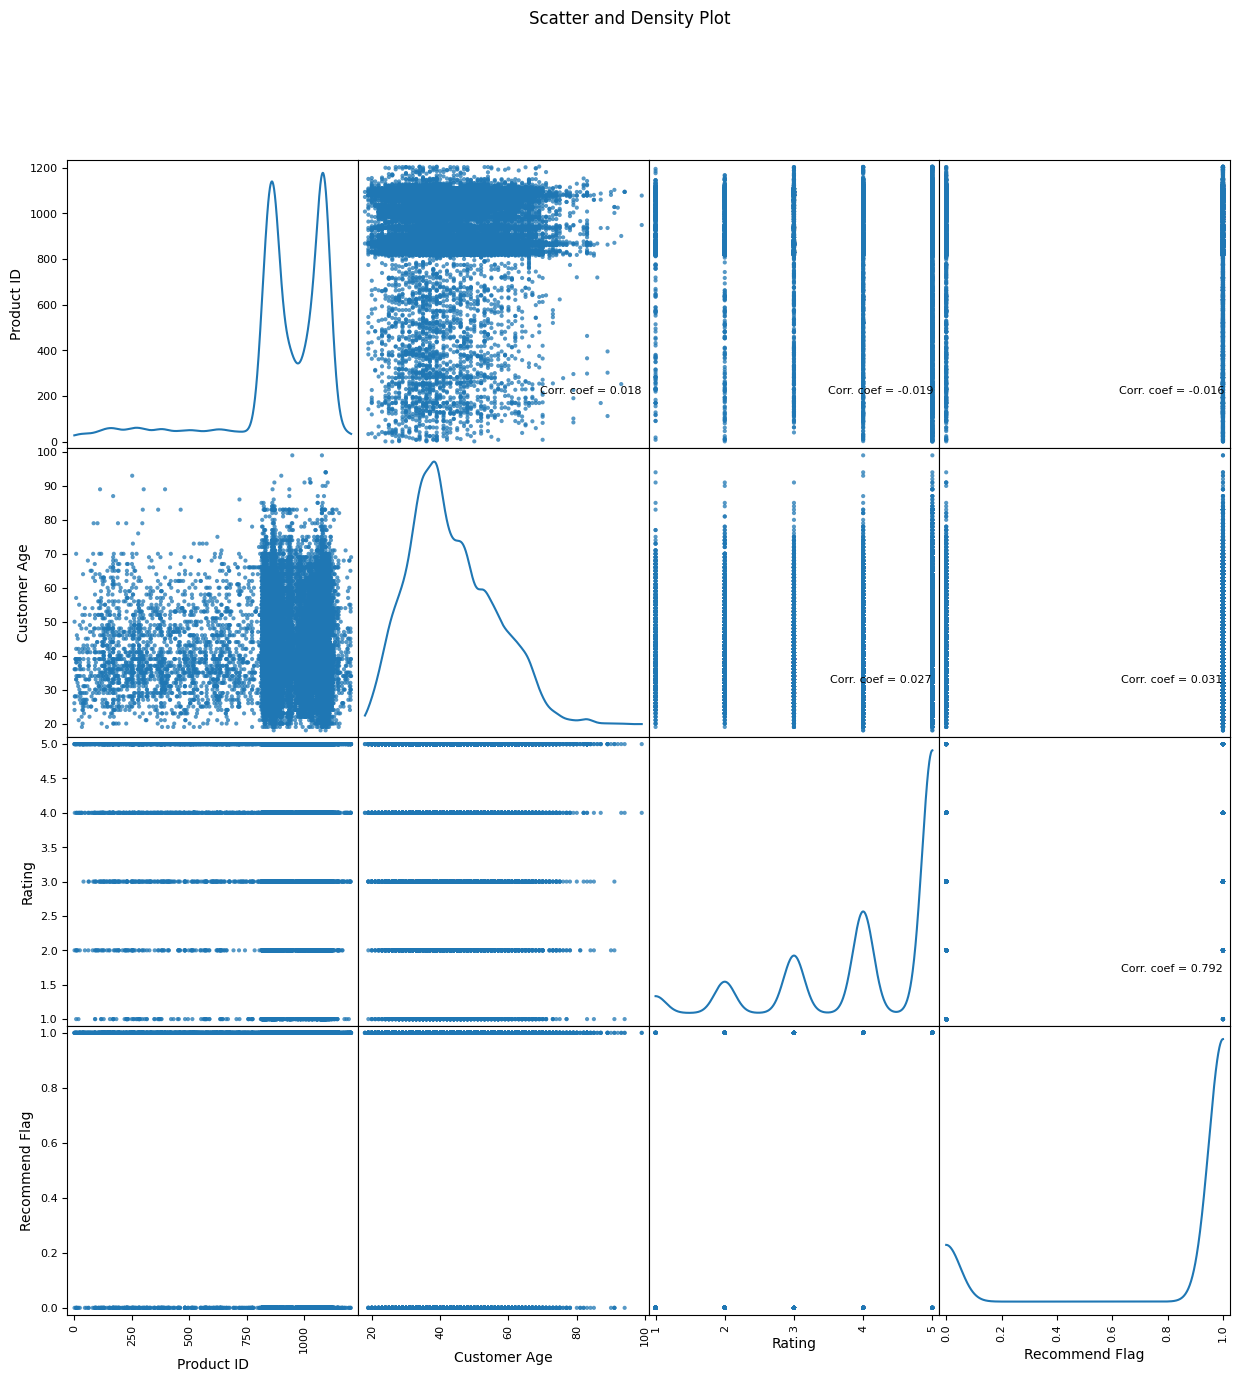

In [ ]:
plotScatterMatrix(data, 15, 8)

### Predictive Analysis & Model Building

In [ ]:
# we are a model for predicting which customers are recommending, also predicting rating based on the review so, we need only ratings and reviews columns. We will drop rest of the columns!

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23486 entries, 0 to 23485

Data columns (total 11 columns):

 #   Column          Non-Null Count  Dtype 

---  ------          --------------  ----- 

 0   Product ID      23486 non-null  int64 

 1   Category        23472 non-null  object

 2   Subcategory1    23472 non-null  object

 3   SubCategory2    23472 non-null  object

 4   Location        23486 non-null  object

 5   Channel         23486 non-null  object

 6   Customer Age    23486 non-null  int64 

 7   Review Title    19676 non-null  object

 8   Review Text     22641 non-null  object

 9   Rating          23486 non-null  int64 

 10  Recommend Flag  23486 non-null  int64 

dtypes: int64(4), object(7)

memory usage: 2.0+ MB


In [ ]:
data.drop(['Product ID', 'Customer Age', 'Review Title', 'Recommend Flag', 'Channel', 'Category', 'Subcategory1', 'SubCategory2','Location'], axis=1, inplace=True)


In [ ]:
data.columns= ['Review Text', 'Rating']
data.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [ ]:
data.isnull().sum()

Review Text    845
Rating           0
dtype: int64

In [ ]:
data.dropna(subset=['Review Text'], inplace=True)

In [ ]:
data.duplicated().sum()

7

In [ ]:
data.drop_duplicates(keep='first')

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 22641 entries, 0 to 23485

Data columns (total 2 columns):

 #   Column       Non-Null Count  Dtype 

---  ------       --------------  ----- 

 0   Review Text  22641 non-null  object

 1   Rating       22641 non-null  int64 

dtypes: int64(1), object(1)

memory usage: 530.6+ KB


In [ ]:
data['Rating'].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

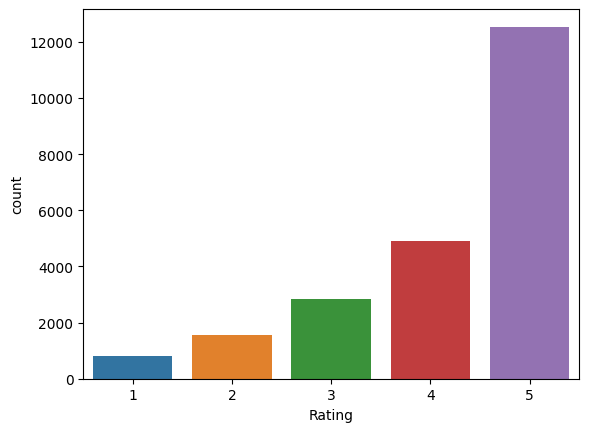

In [ ]:
sns.countplot(x=data['Rating'])
plt.show()

<Axes: xlabel='Rating', ylabel='Count'>

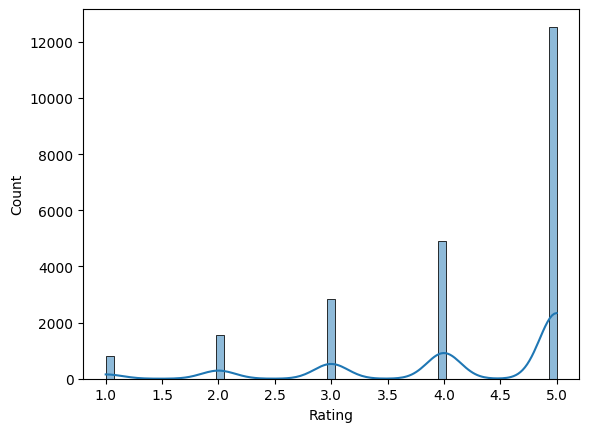

In [ ]:
sns.histplot(data['Rating'], kde=True)

### Text Preprocessing

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download("stopwords")
stop_words = stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package punkt to

[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...

[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Remove Punctuation

In [ ]:
def remove_punctuation(data):
    text = re.sub("n't", 'not', data)
    text = re.sub('[^\w\s]', '', data)
    return text

In [ ]:
processed = remove_punctuation(str(data['Review Text']))
processed

'0        Absolutely wonderful  silky and sexy and comf\n1        Love this dress  its sooo pretty  i happene\n2        I had such high hopes for this dress and reall\n3        I love love love this jumpsuit its fun fl\n4        This shirt is very flattering to all due to th\n                                                       \n23481    I was very happy to snag this dress at such a \n23482    It reminds me of maternity clothes soft stre\n23483    This fit well but the top was very see throug\n23484    I bought this dress for a wedding i have this \n23485    This dress in a lovely platinum is feminine an\nName Review Text Length 22641 dtype object'

In [ ]:
#Tokenization

In [ ]:
def token(data):
    tokenized_text = word_tokenize(data)
    return tokenized_text


In [ ]:
tokenized_data = token(processed.lower())
tokenized_data

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 '22641',
 'dtype',
 'object']

In [ ]:
#Removing Numbers

In [ ]:
def remove_nums(data):
    numberless = [t for t in data if t.isalpha()]
    return numberless

In [ ]:
refined_text = remove_nums(tokenized_data)
refined_text

['absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

In [ ]:
#Remove Stopwords

In [ ]:
def stw(data):
    sw = [w for w in data if w not in new_stopping_words]
    return sw

In [ ]:
sw_text = stw(refined_text)
sw_text

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hopes',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

In [ ]:
#Stemming

In [ ]:
def stemm(data):
    st = [SnowballStemmer("english").stem(word) for word in data]
    return st

In [ ]:
final_text = stemm(sw_text)
final_text

['absolut',
 'wonder',
 'silki',
 'sexi',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretti',
 'happen',
 'high',
 'hope',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flatter',
 'due',
 'th',
 'happi',
 'snag',
 'dress',
 'remind',
 'matern',
 'cloth',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wed',
 'dress',
 'love',
 'platinum',
 'feminin',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

In [ ]:
joined = ' '.join(final_text)
joined

'absolut wonder silki sexi comf love dress sooo pretti happen high hope dress reall love love love jumpsuit fun fl shirt flatter due th happi snag dress remind matern cloth soft stre fit well top see throug bought dress wed dress love platinum feminin name review text length dtype object'

In [ ]:
def Cleaning_process(data):
    processed_text=remove_punctuation(str(data))
    tokenized_data=token(processed_text.lower())
    textwithoutnum= remove_nums(tokenized_data)
    data=stw(textwithoutnum)
    final_data=stemm(data)
    return " ".join(final_data)

In [ ]:
data["Review Text"]= data["Review Text"].apply(Cleaning_process)
data.head()

,Review Text,Rating
0,absolut wonder silki sexi comfort,4
1,love dress sooo pretti happen find store im gl...,5
2,high hope dress realli want work initi order p...,3
3,love love love jumpsuit fun flirti fabul everi...,5
4,shirt flatter due adjust front tie perfect len...,5


In [ ]:
data.head()

,Review Text,Rating
0,absolut wonder silki sexi comfort,4
1,love dress sooo pretti happen find store im gl...,5
2,high hope dress realli want work initi order p...,3
3,love love love jumpsuit fun flirti fabul everi...,5
4,shirt flatter due adjust front tie perfect len...,5


In [ ]:
#Now let's categorize the ratings in only 3 sentiments.
def categorize_sentiment(score):
    if score < 3:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
data['Sentiment'] = data['Rating'].apply(categorize_sentiment)
data.head()

,Review Text,Rating,Sentiment
0,absolut wonder silki sexi comfort,4,Positive
1,love dress sooo pretti happen find store im gl...,5,Positive
2,high hope dress realli want work initi order p...,3,Neutral
3,love love love jumpsuit fun flirti fabul everi...,5,Positive
4,shirt flatter due adjust front tie perfect len...,5,Positive


In [ ]:
data.drop('Rating', axis=1, inplace=True)

In [ ]:
#Word Cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
words_all = " ".join([word for word in data['Review Text']])

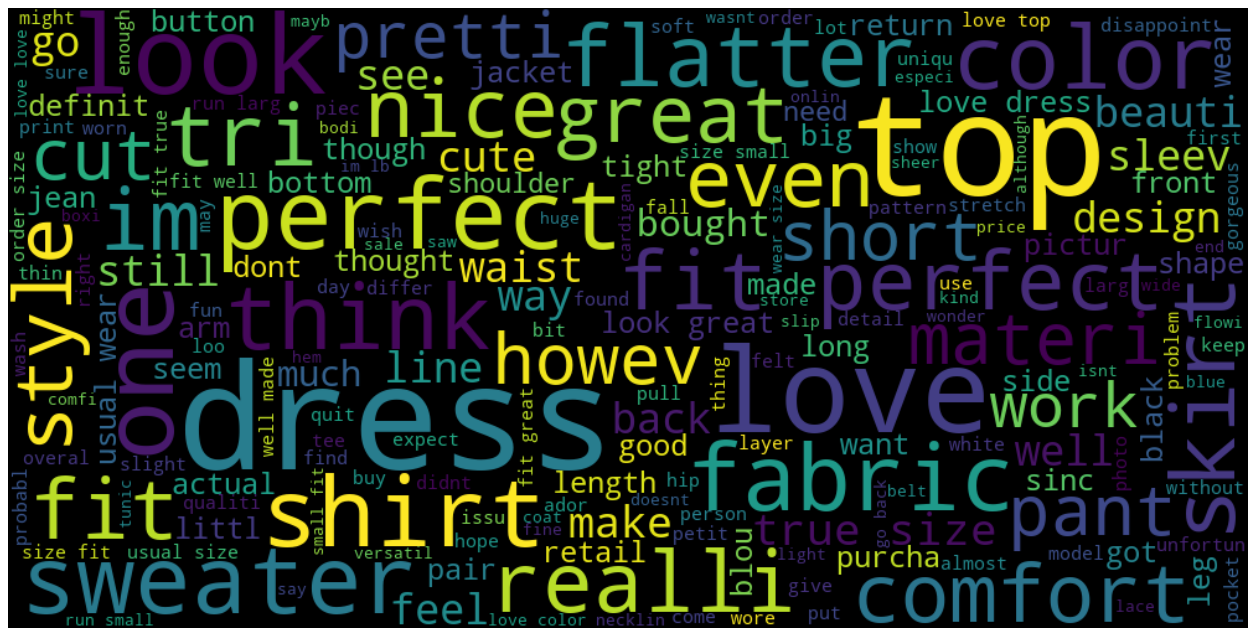

In [ ]:
wordcloud = WordCloud(width = 1000,
                      height = 500,
                      random_state = 21,
                      max_font_size= 119).generate(words_all)
plt.figure(figsize = (20,20), dpi= 80)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

### Model Building

In [ ]:
# First we need to transform the labels in Sentiment column into numerical form so that we can further proceed our model building approach.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['Sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF are word frequency scores that try to highlight words that are more interesting,

In [ ]:
X = data['Review Text']
y = data['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vec = TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [ ]:
#import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
#importing validation models
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

LogisticRegression()

In [ ]:
lr_pred = lr.predict(X_test_vec)

In [ ]:
#Let's create a function to visualize model results
def evaluate_lr(name,y_test, lr_pred):
    cm_test = confusion_matrix(y_test, lr_pred)
    t1 = ConfusionMatrixDisplay(cm_test)
    print("Classification Report for Data Test")
    print(classification_report(y_test, lr_pred))
    t1.plot()

Classification Report for Data Test

              precision    recall  f1-score   support



           0       0.56      0.42      0.48       457

           1       0.49      0.24      0.32       588

           2       0.87      0.97      0.92      3484



    accuracy                           0.82      4529

   macro avg       0.64      0.54      0.57      4529

weighted avg       0.79      0.82      0.79      4529




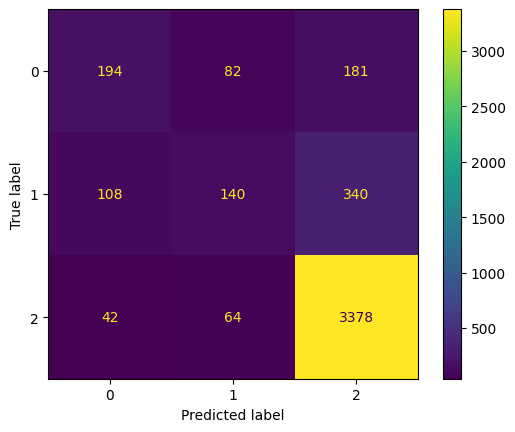

In [ ]:
#Visualizing model results
evaluate_lr("Machine Learning - Classification", y_test, lr_pred)

In [ ]:
#Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_vec, y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(X_test_vec)

In [ ]:
#Let's create a function to visualize model results
def evaluate_dt(name,y_test, dt_pred):
    cm_test = confusion_matrix(y_test, dt_pred)
    t1 = ConfusionMatrixDisplay(cm_test)
    print("Classification Report for Data Test")
    print(classification_report(y_test, dt_pred))
    t1.plot()

Classification Report for Data Test

              precision    recall  f1-score   support



           0       0.30      0.30      0.30       457

           1       0.26      0.23      0.25       588

           2       0.86      0.87      0.87      3484



    accuracy                           0.73      4529

   macro avg       0.47      0.47      0.47      4529

weighted avg       0.72      0.73      0.73      4529




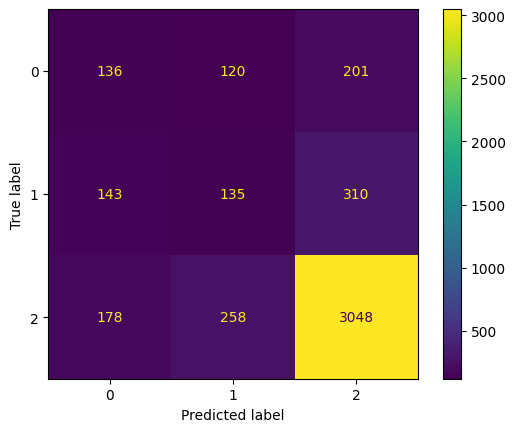

In [ ]:
evaluate_dt("Machine Learning - Classification", y_test, dt_pred)

In [ ]:
#Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(X_test_vec)

In [ ]:
#Let's create a function to visualize model results
def evaluate_rf(name,y_test, rf_pred):
    cm_test = confusion_matrix(y_test, rf_pred)
    t1 = ConfusionMatrixDisplay(cm_test)
    print("Classification Report for Data Test")
    print(classification_report(y_test, rf_pred))
    t1.plot()

Classification Report for Data Test

              precision    recall  f1-score   support



           0       0.66      0.09      0.15       457

           1       0.58      0.01      0.02       588

           2       0.78      1.00      0.88      3484



    accuracy                           0.78      4529

   macro avg       0.67      0.37      0.35      4529

weighted avg       0.74      0.78      0.69      4529




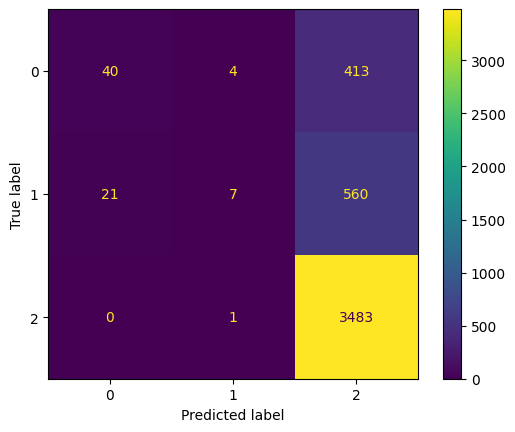

In [ ]:
evaluate_rf("Machine Learning - Classification", y_test, rf_pred)

In [ ]:
#SVM

In [ ]:
svm = SVC()
svm.fit(X_train_vec, y_train)

SVC()

In [ ]:
svm_pred = svm.predict(X_test_vec)

In [ ]:
#Let's create a function to visualize model results
def evaluate_svm(name,y_test, svm_pred):
    cm_test = confusion_matrix(y_test, svm_pred)
    t1 = ConfusionMatrixDisplay(cm_test)
    print("Classification Report for Data Test")
    print(classification_report(y_test, svm_pred))
    t1.plot()

Classification Report for Data Test

              precision    recall  f1-score   support



           0       0.62      0.41      0.49       457

           1       0.53      0.19      0.28       588

           2       0.85      0.98      0.91      3484



    accuracy                           0.82      4529

   macro avg       0.67      0.53      0.56      4529

weighted avg       0.79      0.82      0.79      4529




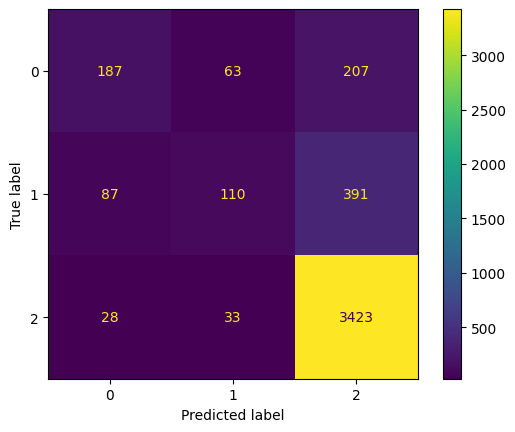

In [ ]:
evaluate_svm("Machine Learning - Classification", y_test, svm_pred)